**ORE SPESE SU QUESTO HOMEWORK**\
- 2 ore il 14-12
- 1 ora il 15-12
- 2 ore il 16-12
- 2 ore il 20-12
- 3 ore il 22-12
- 2 ore il 23-12
- 3 ore il 24-12
- 4 ore il 26-12
- 2 ore l 27-12
- 1 ora il 28-12
- 2 ore il 29-12
- 3 ore il 30-12
- 2 ore il 02-01

# TO DO LIST:
- cancella le prime librerie importate a fine homewrok, stanno li solo per comodita
- sistemare i pesi nel grafo 1


# CONTROLLATO TUTTO FINO A:
- dall'inizio alla fun 7 (esclusa) è tutto ricontrollato alla perfezione , tranne la parte di graphs set up
- vis1: tutto ricontrollato tranne il punto 2 della vis1

In [16]:
pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 KB 6.1 MB/s eta 0:00:0000:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.1 MB/s eta 0:00:00:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [18]:
#DA CANCELLARE

import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.spatial.distance import cdist
from random import randint
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from collections import defaultdict
from operator import itemgetter
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import MiniBatchKMeans
from sklearn_extra.robust import RobustWeightedKMeans

In [19]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import OrderedDict
from itertools import islice
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

## Let's import the datasets
**HERO-NETWORK:**\
It contains the network of heroes who have appeared together in the comics.

In [20]:
dfheros = pd.read_csv(r'hero-network.csv')

In [21]:
dfheros.head(5)

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL


In [22]:
dfheros.shape

(574467, 2)

**EDGES:**\
It contains two columns (hero, comic), indicating which comics the heroes appear in.

In [23]:
dfedges = pd.read_csv(r'edges.csv')

In [24]:
dfedges.head(5)

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251


In [25]:
dfedges.shape

(96104, 2)

**NODES:**\
It contains two columns (node, type), indicating the nodes' name and its type (comic, hero).

In [26]:
dfnodes = pd.read_csv(r'nodes.csv')

In [27]:
dfnodes.head(5)

,node,type
0,2001 10,comic
1,2001 8,comic
2,2001 9,comic
3,24-HOUR MAN/EMMANUEL,hero
4,3-D MAN/CHARLES CHAN,hero


In [28]:
dfnodes.shape

(19090, 2)

# QUESTION 1: DATA

## DATA PREPROCESSING
### 1)

**1.1**

"Some heroes' names in 'hero-netowrk.csv' have extra spaces at the end of their names compared to their names in 'edges.csv'" :

- The following command gets the string of heroes inside column 'hero1' (in dataset heros) that have a space in the last position: '  '. Once we have these heroes, we edit the string by deleting the space in the last position.

In [29]:
for i in range(len(dfheros.hero1)):
    if dfheros.hero1[i][-1] == ' ':
        dfheros.hero1[i]= dfheros.hero1[i][0:-1]

**1.2**

Some heroes' names in 'hero-netowrk.csv' have an extra '/' at the end of their names compared to their names in 'edges.csv'.

- We could do the same thing of above, but we noticed that in the column hero (dataset edges) we have heros which have in the last position a slash: '/'. So we can't just remove all '/' in last position in hero (dataset edges) otherwise we will end up in the opposite situation, i.e. heroes that have an extra '/' in the heroes dataset but don't have it in the edges dataset. Instead we should remove only the heroes that within hero1 (in dataset heros) have a slash in the last position, while in hero (dataset edges) they don't.

- However, to make things easier, we decided to remove the / in the last position in all heroes even those that are normally registered with the / in the last position (for example 8-BALL/ it is normally registered with the / in the last position because it has it in both the heros and edges datasets, but to make things easier we will remove the / even for 8-BALL/ in both dataset)

- The following query, therefore, removes the / in last position (to whoever has it) to all heroes in 'hero1' (dataset heros) and in 'hero' (dataset edges):

In [30]:
#for the dataset 'dfheros' in column 'hero1'
for i in range(len(dfheros.hero1)):
    if dfheros.hero1[i][-1] == '/':
        dfheros.hero1[i]= dfheros.hero1[i][0:-1]
        
#for the dataset 'dfheros' in column 'hero2'
for i in range(len(dfheros.hero2)):
    if dfheros.hero2[i][-1] == '/':
        dfheros.hero2[i]= dfheros.hero2[i][0:-1]
        
#for the dataset 'dfedges' in column 'hero'
for i in range(len(dfedges.hero)):
    if dfedges.hero[i][-1] == '/':
        dfedges.hero[i]= dfedges.hero[i][0:-1]

**1.3**

The hero name 'SPIDER-MAN/PETER PARKER' in 'edges.csv' has been changed to 'SPIDER-MAN/PETER PAR' in 'hero-network.csv' due to a string length limit in 'hero-network.csv'

We can see inside the dataset edges there are 1577 times the name 'SPIDER-MAN/PETER PARKER' in the column 'hero'.

In [31]:
dfedges[dfedges.hero == 'SPIDER-MAN/PETER PARKER'].shape

(1577, 2)

In order to avoid the problem of having two different name for the same hero in two different dataset, we decided to change inside the dataset edges, the name of the hero 'SPIDER-MAN/PETER PARKER' in 'SPIDER-MAN/PETER PAR'.

In [32]:
dfedges.hero = dfedges.hero.replace('SPIDER-MAN/PETER PARKER', 'SPIDER-MAN/PETER PAR')

Altought before were 1577 rows, now we can see that 'SPIDER-MAN/PETER PARKER' doesn't appear anymore.

In [33]:
dfedges[dfedges.hero == 'SPIDER-MAN/PETER PARKER'].shape

(0, 2)

### 2)

Some entries in the 'hero-network.csv' have the same hero in both columns. In the graph, these entries form a self-loop. Because a self-loop makes no sense in this network, you can safely remove those from the dataset.

- We can observe from the following cell that the rows we need to delete are 2232.

In [34]:
counter = 0
for i in range(len(dfheros.hero1)):
    if dfheros.hero1[i] == dfheros.hero2[i]:
        counter += 1
print('The number of total rows are: ', len(dfheros), "\nInstead, the number of rows that have the same hero in 'hero1' and 'hero2' are: ", counter)

The number of total rows are:  574467 
Instead, the number of rows that have the same hero in 'hero1' and 'hero2' are:  2232


- The following code iterates through the heros dataframe, if it encounters a row that has the same name in 'hero1' and 'hero2' then it deletes that row.

In [35]:
for i in range(len(dfheros.hero1)):
    if dfheros.hero1[i] == dfheros.hero2[i]:
        dfheros = dfheros.drop(i)

- Let's verify that 2232 rows have actually been deleted!


- Before we had a length of 574467, subtracting 2232 from it, we should obtain that the length of the dataframe is now equal to 572235:

In [36]:
len(dfheros)

572235

## GRAPHS SETUP
### 1)

- An edge between two heroes can be found if they have appeared in the same comic together. DIRE QUALCOSA SUI PESI!!!! Let's find all edges

In [37]:
#SISTEMARE I PESI, NON CAPISCO COME CAZZO DOBBIAMO FARLI, LEGGI ANCHE SLACK NEL CASO
edges = dfheros.groupby(['hero1', 'hero2']).size().reset_index(name='weight')

# QUESTO COMANDO MI RENDE I PESI INVERSAMENTE PROPORZIONALI
edges.weight = round(1/ edges.weight,4)

# crea il grafo
G1 = nx.from_pandas_edgelist(edges, 'hero1', 'hero2', edge_attr = 'weight')

In [38]:
warnings.filterwarnings("ignore", category=DeprecationWarning) #this command is used to don't visualize the warnings
nx.info(G1)

'Graph with 6559 nodes and 178133 edges'

In [39]:
#PROVA
for u, v, d in G1.edges(data=True):
    if (d['weight']) == 0.0045:
        print(f"L'arco ({u}, {v}) ha peso {d['weight']}")

L'arco (CAPTAIN AMERICA, IRON MAN/TONY STARK ) ha peso 0.0045


### 2)

- The following graph has all heroes and comics as nodes, taken from the "node" column of the "dfnodes" dataset. Here there will not be edges connecting two heroes or two comics together, but just edges connecting hero and comic. A hero is connected by a edge to the comic only if that hero has appeared in that specific comic.

In [40]:
G2 = nx.Graph()
G2 = nx.from_pandas_edgelist(dfedges, 'comic', 'hero')

# we add the type of each node, hero or comic (we will need in functionality 1)
for index, row in dfedges.iterrows():
    G2.add_node(row['hero'], type='hero')
    G2.add_node(row['comic'], type='comic')

In [41]:
warnings.filterwarnings("ignore", category=DeprecationWarning) #this command is used to hide the warnings
nx.info(G2)

'Graph with 19087 nodes and 96104 edges'

# QUESTION 2: BACKEND IMPLEMENTATION

## Functionality 1 - extract the graph's features

**Top N heroes**: The top N heroes who have appeared in the most number of comics.

In [42]:
def top_N_heroes(df, N = None):
    if N == None:
        N = len(df)
    
    # group by 'hero' and count the number of comics where each hero has appeared
    df_counts = df.groupby('hero').comic.count().reset_index(name='count')
    df_counts = df_counts.sort_values(by='count', ascending=False)
    
    # take the N heroes who have appeared in the most number of comics
    top_N = df_counts[:N]
    
    # names of top N heroes
    names_topN = top_N['hero']
    
    return list(names_topN)

#### F1.1 The number of nodes in the network (if type 2, report for both node types)

- The following function takes as input the graph and the type of graph, if the type of graph is 1, it returns the number of total nodes, if instead the type of graph is 2, it returns the number of total nodes that refer to a hero and the number of total nodes that refer to a comic.

In [43]:
def nodes(graph, graph_type):
    # if graph type is equal to 1, return the total number of nodes
    if graph_type == 1:
        return (f"The graph has {graph.number_of_nodes()} nodes")
        
    #if instead graph type is equal to 2, count all nodes that refer to a hero and all nodes that refer to a comic and return them.
    else:   
        attributes = nx.get_node_attributes(graph, 'type')
        count_hero = list(attributes.values()).count('hero')
        count_comic = list(attributes.values()).count('comic')
        return (f"The graph has {count_hero} nodes referring to heros and {count_comic} nodes referring to comics.")

#### F1.2 The number of collaborations of each superhero with the others (only if type 1)

- The following function takes as input the graph, the type of graph and the number of top N heroes to be considered and outputs the number of collaborations of each hero with the others.

In [44]:
def collaborations(graph, graph_type, N= None):
    # If graph type is equal to 2 we can't compute it.
    if graph_type == 2:
        return ("Sorry, I can't compute the number of collaborations of each superhero with the others for type 2 graphs, only for type 1 graphs.")
        
    else:
        
        # Create a new empty dictionary
        node_degrees = {}
    
        # Compute the degree of each node and add it to the dictionary
        for node in graph:
            degree = graph.degree(node)
            node_degrees[node] = degree
            
        # Sort the dictionary by its values
        sorted_dict = dict(sorted(node_degrees.items(), key=lambda x: x[1], reverse=True))
        
        
        # So far we have created an ordered dictionary where we have heroes as keys and as values the number of collaborations
        # they have. How ever we want a dictionary sorted by top N heroes. Let's do it!
        
        
        # Create a new empty dictionary
        dizionario_filtrato = {}
        
        # Go through the list of top N heroes and add hero after hero to the dictionary, with its corresponding value of collaborations.
        for elemento in top_N_heroes(dfedges, N = None):
            if elemento in sorted_dict:
                dizionario_filtrato[elemento] = sorted_dict[elemento]
                
        # Return the first N element of the dictionary (which are the top N heroes)  
        return dict(islice(dizionario_filtrato.items(), N))

**F1.3 The number of heroes that have appeared in each comic (only if type 2)**

- The following function takes as input the graph, the type of graph and an integer N and returns as output an ordered dictionary of length N, in which there are comics as key and as values the number of heroes appeared in that comic. 


- The decision to give N as input (which in the final function 'features' actually indicates the number of top N heroes) is due to the fact that taking the whole dictionary (and not just the first N elements), the function returns a dictionary of length 12651, and in terms of visualization for the final function it wasn't confortable.

In [45]:
def heros_per_comic(graph, graph_type, N= None):
    # If graph type is equal to 1 we can't compute it.
    if graph_type == 1:
        return ("Sorry, I can't compute the number of heroes that have appeared in each comic for type 1 graphs, only for type 2 graphs.")
    
    else:
        # Create a dictionary that has the node as the key and the type of that node as the value (comic or hero)
        attributes = nx.get_node_attributes(graph, 'type')
        
        # Crea filtered_d, ovvero un dizionario che ha come elementi solo nodi di tipo 'comic'
        filtered_d = {k: v for k, v in attributes.items() if v != 'hero'}
        
        # Create a new empty dictionary
        final_d = {}
        
        # For each key in filtered_d (which would all be nodes of type comic), calculate the degree and add to the final_d 
        # dictionary that node as the key and the degree as the value
        for i in filtered_d:
            final_d[i] = graph.degree(i)
            
        # Sort the dictionary by its values
        sorted_d = dict(sorted(final_d.items(), key=lambda item: item[1], reverse = True))
        
        # Returns the first N elements of the dictionary
        return dict(islice(sorted_d.items(), N))

**F1.4 The network's density**

- In a network, density refers to the number of edges in the network compared to the total number of possible edges. A network with a high density has a large number of edges, while a network with a low density has few of them.


- To compute the density of a network, we need to use the following formula:
  - Density = (Number of edges in the network) / (Total number of possible edges)

In [46]:
def density(graph):
    # Compute the total number of nodes
    num_edges = graph.number_of_edges()
    # Compute the total number of edges
    num_possible_edges = (graph.number_of_nodes() * (graph.number_of_nodes() - 1)) / 2
    # Compute the density
    density = num_edges / num_possible_edges
    return round(density,4)

**F1.5 The network's degree distribution**

- The distribution degree of a graph is a measure of how often different degrees of nodes appear within the graph. The following function takes the graph as input and returns the degree distribution, i.e. a dictionary whose keys are the degrees of the nodes of the graph and as values it has the number of nodes within the graph that have that degree.

In [47]:
def distribution(graph):
  # Create an empty dictionary to count the number of nodes with each degree
  degree_count = {}

  # Iterate over the nodes of the graph
  for node in graph.nodes():
    # Get the degree of the current node using the degree method of NetworkX
    degree = graph.degree(node)

    # If the degree is not yet in the dictionary, add a new entry
    if degree not in degree_count:
        degree_count[degree] = 0

    # Increment the counter for the current degree
    degree_count[degree] += 1

  # Sort the dictionary by keys (the degrees of the nodes) in ascending order
  degree_count = sorted(degree_count.items(), key=lambda x: x[0])

  # Return the sorted dictionary
  return dict(degree_count)

**F1.6 The average degree of the network**

- The following function takes a graph as input and returns the average degree of that graph. The average degree would be the sum of all the degrees of the nodes, divided by how many nodes there are within the graph.

In [48]:
def average_degre(graph):
    # Initialize the total degree counter to zero
    total_degree = 0
  
    # Iterate over the nodes of the graph and add the degree of every node to the total degree counter
    for node in graph:
        total_degree += len(graph[node])
  
    # Divide the total degree by the number of nodes in the graph and return the rounded result
    return round(total_degree / len(graph))

**F1.7 The network's Hubs (hubs are nodes having degrees more extensive than the 95th percentile of the degree distribution)**

In [49]:
#cambia nomi ecc
def get_hubs(graph, percentile = 95):
    dist = distribution(graph)

    threshold = np.percentile(dist.degree, percentile)

    return list(dist[dist.degree >= threshold].node.values)

**F1.8 Whether the Network is sparse or dense**

In [50]:
def dense_or_sparse(graph):
    if density(graph) < 0.5:
        return 'Sparse'
    else:
        return 'Dense'

# **ADESSO CHE HO DEFINITO TUTTE LE FUNZIONI, FACCIAMO UN'UNICA FUNZIONE PER PLOTTARCI TUTTO QUANTO INSIEME**

In [51]:
def features(graph, graph_type, N = None):
    if (graph_type != 1) & (graph_type != 2):
        return 'The type of graph entered is no correct.'
    else:
        nodi = nodes(graph, graph_type)
        n_collaborations = collaborations(graph, graph_type, N)
        n_heros_each_comic = heros_per_comic(graph, graph_type, N)
        densità = density(graph)
        network_degree_distribution = distribution(graph)
        average_degree = average_degre(graph)
        #hubs = get_hubs(graph, percentile = 95)
        dense_sparse = dense_or_sparse(graph)
    print('1)', nodi)
    print('****'*25)
    print('2)', n_collaborations)
    print('****'*25)
    print('3) The number of heroes that have appeared in each comic are: ', n_heros_each_comic)
    print('****'*25)
    print('4) The density of the graph is ', densità)
    print('****'*25)
    print('5) The network degree distribution is: ', network_degree_distribution)
    print('****'*25)
    print('6) The average degree of the network is ', average_degree)
    print('****'*25)
    #SCRCIVI CHE PRINTI GLI HUBS
    print('****'*25)
    print('7) The graph is ', dense_sparse)
    #return nodi, n_collaborations, 'The number of heroes that have appeared in each comic are: ',  n_heros_each_comic, 'The density of the graph is ' + str(densità), 'The average degree of the network is ' + str(average_degree), 'The average degree of the network is ' + dense_sparse

In [52]:
features(G2, 2, 10)

1) The graph has 6436 nodes referring to heros and 12651 nodes referring to comics.
****************************************************************************************************
2) Sorry, I can't compute the number of collaborations of each superhero with the others for type 2 graphs, only for type 1 graphs.
****************************************************************************************************
3) The number of heroes that have appeared in each comic are:  {'COC 1': 111, 'IW 3': 91, 'IW 1': 90, 'H2 279': 87, 'IW 4': 80, 'IW 2': 76, 'MAXSEC 3': 72, 'FF 370': 62, 'IW 6': 60, 'M/GN 1': 60}
****************************************************************************************************
4) The density of the graph is  0.0005
****************************************************************************************************
5) The network degree distribution is:  {1: 3274, 2: 2027, 3: 1738, 4: 1469, 5: 1409, 6: 1223, 7: 1027, 8: 990, 9: 803, 10: 688, 11: 608, 12: 559

## Functionality 2 - Find top superheroes!

In [53]:
G_fun2 = nx.Graph()

In [54]:
G_fun2 = nx.from_pandas_edgelist(dfedges, 'comic', 'hero')

In [55]:
ln_N = len(G_fun2.nodes()) # This will be helpful to set up our main function

We tried building and/or manipulating some given algorithms for the centrality measures. We could only do 3 out of 4 functions from scratch (DegreeCentrality, PageRank and ClosenessCentrality), meanwhile for the Betweenness we use the built-in function in networkx. These functions will then be implemented in our main function.

**Degree Centrality**

In [56]:
def degreeCentrality(G):
    output_list = []
    N = len(G.nodes())
    degrees = G.degree()
    for i in degrees:
        output_sol = i[1]/(N-1)
        output = i[0], output_sol
        output_list.append(output)
    return output_list

**PageRank**

In [57]:
def pageRank(G):
    if len(G) == 0:
        return {}
    if not G.is_directed():
        D = G.to_directed()
    else:
        D = G
    W = nx.stochastic_graph(D, weight = 'weight')
    N = W.number_of_nodes()
    x = dict.fromkeys(W, 1.0 / N)
    p = dict.fromkeys(W, 1.0 / N)
    dweights = p
    dnodes = [n for n in W if W.out_degree(n, weight = 'weight') == 0.0]
    for i in range(100):
        xlast = x
        x = dict.fromkeys(xlast.keys(), 0)
        dsum = 0.85*sum(xlast[n] for n in dnodes)
        for n in x:
            for number in W[n]:
                x[number] += 0.85*xlast[n] * W[n][number]['weight']
            x[n] += dsum * dweights[n] + (0.15)*p[n]
        err = sum([abs(x[n] - xlast[n]) for n in x])
        if err < N*(1.0e-6):
            return x

**Closeness Centrality**

In [58]:
def closenessCentrality(G):
    path_length = nx.single_source_shortest_path_length
    nodes = G.nodes()
    closeness_centrality = {}
    for n in nodes:
        sp = path_length(G,n)
        totsp = sum(sp.values())
        if totsp > 0.0 and len(G) > 1:
            closeness_centrality[n] = (len(sp)-1.0) / totsp
            s = (len(sp)-1.0) / ( len(G) - 1 )
            closeness_centrality[n] *= s
        else:
            closeness_centrality[n] = 0.0
    return closeness_centrality

From the exercise request, we understand that we need the data for only the top N superheros. Sometimes this N is given, but it should be set to ln_N, which means that we need to consider the whole graph. If we set up a specific N number, then we need to build a graph which takes only the top N superheros with their data (so their edges with 'comic' nodes).

In [59]:
def topNsuperherosGraph(G, N=ln_N):
    
    G_top_N_def = nx.Graph()
    ln_N = len(G.nodes())
    
    if N != ln_N:
        G_sorted_bydeg = sorted(G, key=lambda x: G.degree(x), reverse=True)
        top_N_superheros = []
        for i in G_sorted_bydeg:
            if i in list(dfedges.hero):
                top_N_superheros.append(i)
            if len(top_N_superheros) >= N:
                break

        edges_top_N_superheros = []
        for i in top_N_superheros:
            edges_top_N_superheros.append(list(G.edges(i)))
    
        G_top_N_def.add_nodes_from(top_N_superheros)
        for i in edges_top_N_superheros:
            G_top_N_def.add_edges_from(i)
        return G_top_N_def
    
    else:
        G_top_N_def = G
        return G_top_N_def

Our main function is now ready to be set up.

In [60]:
def centralityMeasures(G, node, measure, N=ln_N):
    """
    INPUT:
    'G' is our graph data
    'Node' is the given node (which can be both a comic node or a hero node)
    'Measure' is the centrality measure chosen by the user. It can either be: 'Betweenness', 'PageRank',
              'ClosenessCentrality' or 'DegreeCentrality'
    'N' is the number of top heros that we consider for our calculations
    
    OUTPUT:
    First number is the given node's centrality value.
    Second list is the metric's value over the considered graph.
    """
    # We create the top N heros graph with the function we created before.
    G_top_N = topNsuperherosGraph(G, N)
    
    if node in list(G_top_N.nodes()):
        # We check if the node we chose is actually in the top N heros list or is a comic connected to a top N hero.
        if measure == 'Betweenness':
            centrality = nx.betweenness_centrality(G_top_N)
            return centrality[node], centrality
        elif measure == 'PageRank':
            centrality = pageRank(G_top_N)
            return centrality[node], centrality
        elif measure == 'ClosenessCentrality':
            centrality = closenessCentrality(G_top_N)
            return centrality[node], centrality
        elif measure == 'DegreeCentrality':
            centrality = degreeCentrality(G_top_N)
            # The degree centrality function returns a different type of list so we cannot
            # use 'centrality[node]' because it doesn't work. 
            # This is what we do to get the centrality for the node instead:
            for i in range(len(centrality)):
                if centrality[i][0] == node:
                    return centrality[i][1], centrality
    else:
        return 'Node not available'

### Betweenness Centrality

In [61]:
bet_centrality = centralityMeasures(G_fun2, 'CAPTAIN AMERICA', 'Betweenness', 5)

In [62]:
bet_centrality

(0.3500968759429649,
 {'SPIDER-MAN/PETER PAR': 0.5069146110204913,
  'CAPTAIN AMERICA': 0.3500968759429649,
  'IRON MAN/TONY STARK': 0.28932290306792047,
  'THING/BENJAMIN J. GR': 0.2935705874808108,
  'THOR/DR. DONALD BLAK': 0.23317992763561393,
  'A 11': 0.0029892366269219945,
  'A 118': 0.004855358600121925,
  'A 1.5': 0.003433350901557625,
  'A 168': 0.0029892366269219945,
  'A 221': 0.0029892366269219945,
  'A 235': 0.0008314983970336748,
  'A 236': 0.0008314983970336748,
  'A 237': 0.0008314983970336748,
  'A 258': 0.0008314983970336748,
  'A 298': 0.0008314983970336748,
  'A 3': 0.003433350901557625,
  'A3 1': 0.004855358600121925,
  'A3 10': 0.004855358600121925,
  'A3 11': 0.004855358600121925,
  'A 314': 0.0029892366269219945,
  'A 315': 0.0017516126834711634,
  'A 316': 0.0029892366269219945,
  'A 317': 0.0029892366269219945,
  'A 318': 0.0029892366269219945,
  'A3 25': 0.0029892366269219945,
  'A 329': 0.0029892366269219945,
  'A 330': 0.0029892366269219945,
  'A 332': 0.00

In [63]:
bet_centralities = bet_centrality[1]
avg_centrality_bet = sum(bet_centralities.values())/len(bet_centralities)
centrality_node_bet = bet_centrality[0]

### PageRank

In [64]:
pr_centrality = centralityMeasures(G_fun2, 'CAPTAIN AMERICA', 'PageRank', 5)

In [65]:
pr_centrality

(0.09574518461344195,
 {'SPIDER-MAN/PETER PAR': 0.13700096835712794,
  'CAPTAIN AMERICA': 0.09574518461344195,
  'IRON MAN/TONY STARK': 0.08206483416621957,
  'THING/BENJAMIN J. GR': 0.07646756588610204,
  'THOR/DR. DONALD BLAK': 0.06731517190309137,
  'A 11': 0.00028893391713486003,
  'A 118': 0.0003567229797299969,
  'A 1.5': 0.0002954230134918695,
  'A 168': 0.00028893391713486003,
  'A 221': 0.00028893391713486003,
  'A 235': 0.00016784061992230418,
  'A 236': 0.00016784061992230418,
  'A 237': 0.00016784061992230418,
  'A 258': 0.00016784061992230418,
  'A 298': 0.00016784061992230418,
  'A 3': 0.0002954230134918695,
  'A3 1': 0.0003567229797299969,
  'A3 10': 0.0003567229797299969,
  'A3 11': 0.0003567229797299969,
  'A 314': 0.00028893391713486003,
  'A 315': 0.00022798469227867788,
  'A 316': 0.00028893391713486003,
  'A 317': 0.00028893391713486003,
  'A 318': 0.00028893391713486003,
  'A3 25': 0.00028893391713486003,
  'A 329': 0.00028893391713486003,
  'A 330': 0.00028893391

In [66]:
pr_centralities = pr_centrality[1]
avg_centrality_pr = sum(pr_centralities.values())/len(pr_centralities)
centrality_node_pr = pr_centrality[0]

### Closeness Centrality

In [67]:
cl_centrality = centralityMeasures(G_fun2, 'CAPTAIN AMERICA', 'ClosenessCentrality', 5)

In [68]:
cl_centrality

(0.4127507802050825,
 {'SPIDER-MAN/PETER PAR': 0.4314474787957871,
  'CAPTAIN AMERICA': 0.4127507802050825,
  'IRON MAN/TONY STARK': 0.39963739963739964,
  'THING/BENJAMIN J. GR': 0.387137241783056,
  'THOR/DR. DONALD BLAK': 0.3866844875114861,
  'A 11': 0.4355885950879834,
  'A 118': 0.500270182643467,
  'A 1.5': 0.4352609308885755,
  'A 168': 0.4355885950879834,
  'A 221': 0.4355885950879834,
  'A 235': 0.3567080218848732,
  'A 236': 0.3567080218848732,
  'A 237': 0.3567080218848732,
  'A 258': 0.3567080218848732,
  'A 298': 0.3567080218848732,
  'A 3': 0.4352609308885755,
  'A3 1': 0.500270182643467,
  'A3 10': 0.500270182643467,
  'A3 11': 0.500270182643467,
  'A 314': 0.4355885950879834,
  'A 315': 0.3899418751579479,
  'A 316': 0.4355885950879834,
  'A 317': 0.4355885950879834,
  'A 318': 0.4355885950879834,
  'A3 25': 0.4355885950879834,
  'A 329': 0.4355885950879834,
  'A 330': 0.4355885950879834,
  'A 332': 0.40255674406470127,
  'A 333': 0.40255674406470127,
  'A 59': 0.30142

In [69]:
cl_centralities = cl_centrality[1]
avg_centrality_cl = sum(cl_centralities.values())/len(cl_centralities)
centrality_node_cl = cl_centrality[0]

### Degree Centrality

In [70]:
deg_centrality = centralityMeasures(G_fun2, 'CAPTAIN AMERICA', 'DegreeCentrality', 5)

In [71]:
deg_centrality

(0.28818319291423633,
 [('SPIDER-MAN/PETER PAR', 0.34067833225318644),
  ('CAPTAIN AMERICA', 0.28818319291423633),
  ('IRON MAN/TONY STARK', 0.24843378699503132),
  ('THING/BENJAMIN J. GR', 0.20803629293583928),
  ('THOR/DR. DONALD BLAK', 0.20652408727586952),
  ('A 11', 0.0008641175199827177),
  ('A 118', 0.001080146899978397),
  ('A 1.5', 0.0008641175199827177),
  ('A 168', 0.0008641175199827177),
  ('A 221', 0.0008641175199827177),
  ('A 235', 0.00043205875999135883),
  ('A 236', 0.00043205875999135883),
  ('A 237', 0.00043205875999135883),
  ('A 258', 0.00043205875999135883),
  ('A 298', 0.00043205875999135883),
  ('A 3', 0.0008641175199827177),
  ('A3 1', 0.001080146899978397),
  ('A3 10', 0.001080146899978397),
  ('A3 11', 0.001080146899978397),
  ('A 314', 0.0008641175199827177),
  ('A 315', 0.0006480881399870382),
  ('A 316', 0.0008641175199827177),
  ('A 317', 0.0008641175199827177),
  ('A 318', 0.0008641175199827177),
  ('A3 25', 0.0008641175199827177),
  ('A 329', 0.00086411

In [72]:
deg_centralities = deg_centrality[1]
sum_deg_centralities = 0
for i in range(len(deg_centralities)):
    sum_deg_centralities += deg_centralities[i][1]
avg_centrality_deg = sum_deg_centralities/len(deg_centralities)
centrality_node_deg = deg_centrality[0]

## Functionality 3 - Shortest ordered Route

In [73]:
G2 = nx.Graph()
G2 = nx.from_pandas_edgelist(dfedges, 'hero', 'comic')
G2.name = 'Second Graph'
G2.number_of_nodes(), G2.number_of_edges(), dfnodes.shape[0], dfedges.shape[0]

# we add the type of each node, hero or comic (we will need in functionality 1)
for index, row in dfedges.iterrows():
    G2.add_node(row['hero'], type='hero')
    G2.add_node(row['comic'], type='comic')

In [74]:
N = 10
lst = list(G2.nodes)
lst[0]
node = lst[0]
visited = set()
comics_per_hero = dfedges.groupby('hero').size().sort_values(ascending=False)
heros = pd.DataFrame(comics_per_hero.T.head(N).T)
def shortest_order_route(G2, h, h1, hn, N):  #function for dfs 
    node = h1
    c = 0
    if h1 != hn:
        if node not in visited:
            print (node)
            c+=1
            visited.add(node)
            for neighbour in G2[node]:
                shortest_order_route(G2, heros, neighbour, heros.index[0], 10)
print("Shortest Ordered Route")
shortest_order_route(G2, heros, node, heros.index[0], 10)

Shortest Ordered Route
24-HOUR MAN/EMMANUEL
AA2 35
FROST, CARMILLA
AA2 21
GROK
AA2 22
ABRAXAS
AA2 23
HAWK
A '00
BLISS, MISS
BRUTACUS
FF 14
BINARY/CAROL DANVERS
A 10
ANT-MAN/DR. HENRY J.
A '01
CAPTAIN MARVEL II/MO
A 12
APE MAN/GORDON MONK
CX 3
BANSHEE/SEAN CASSIDY
AF 88
AURIC
AF 76
BOX IV/MADISON JEFFR
A 320
CAPTAIN AMERICA
A 1
ENCHANTRESS/AMORA/HE
A 100
ARAGORN
A 11
BEAST/HENRY &HANK& P
A 13
COUNT NEFARIA, LUCHI
A 164
BLACK PANTHER/T'CHAL
A 105
AMPHIBIUS
M/FAN 1
ANDERSSEN, TANYA
M/FAN 2
ANGEL/WARREN KENNETH
A 111
BLACK WIDOW/NATASHA
A 112
IRON MAN/TONY STARK
A 101
QUICKSILVER/PIETRO M
A 102
DMITRI
UX 99
BLACK TOM CASSIDY
ASM 229
GRANT, GLORIA GLORY
ASM '01
FLUFFY
ASM2 27
P
Q
ROBERTSON, RANDY
ASM 105
GREEN GOBLIN/NORMAN
A 16
BARON BLOOD/JOHN FAL
CA 253
JARVIS, EDWIN
A 108
CAPTAIN MARVEL/CAPTA
A 106
GRIM REAPER/ERIC WIL
A 107
JONES, RICHARD MILHO
A 103
BLOB/FRED J. DUKES
A 15
AVALANCHE/DOMINIC PE
A 312
DR. DOOM/VICTOR VON
A 118
BLACK BOLT/BLACKANTO
A 127
CRYSTAL [INHUMAN]
A 110
CYCLOPS/S

RecursionError: maximum recursion depth exceeded while calling a Python object

## Functionality 4 - Disconnecting Graphs

In [75]:
G_fun4 = nx.Graph()

In [76]:
G_fun4 = nx.from_pandas_edgelist(dfedges, 'comic', 'hero')

In [77]:
ln_N = len(G_fun4.nodes())

Since the function for the point 2.4 only asks how many links are required to disconnect the graph into two subgraphs, the function's output will be a number. So, for every 'comic' node that the two heros have in common, it will add 1 to a count set to 0 at the beginning. If we remove all the nodes 'in common', then the graph will be disconnected. For this function we will also implement the 'topNsuperherosGraph' function written and used for Functionality 2.

In [78]:
def minimumCut(G, heroA, heroB, N=ln_N):
    """
    INPUT:
    'G' is the graph data
    'heroA' is the superhero to which will relate sub-graph G_a
    'heroB' is the superhero to which will relate sub-graph G_b
    'N' is the number of top heros that we consider for our calculations
    
    OUTPUT:
    A number that represents the links we should remove to disconnect the graph into the two subgraphs
    """
    # We create the top N superheros graph with the function written before.
    G_top_N = topNsuperherosGraph(G, N)
    
    G_copy = G_top_N.copy()
    
    minCut = float('inf') # Initialized minimum cut to the maximum value possible
    
    G_copy.add_edge(heroA, heroB)
    
    component = nx.node_connected_component(G_copy, heroA)  # This gets the set of nodes in the same component as heroA
    cutSize = sum([G_copy.degree(x) for x in component]) # Calculate the size of the cut
    minCut = min(minCut, cutSize) # Update the minimum cut
    
    G_copy.remove_edge(heroA, heroB)
    
    G_a = list(component) # Create a list of the nodes in the first subgraph
    G_b = [x for x in G_top_N.nodes() if x not in component] # Create a list of the nodes in the second subgraph
    
    return minCut, G_a, G_b

The function first creates a copy of the top N vertices subgraph and adds an edge between heroA and heroB. It then calculates the size of the cut as the sum of the degrees of all the vertices in the same connected component as heroA. The minimum cut is then updated to the minimum of the current minimum cut and the size of the cut. The function then removes the edge between heroA and heroB and creates lists of the vertices in each of the two subgraphs. Finally, the function returns the minimum cut and the two subgraphs.

However, keep in mind that it only finds the minimum cut between heroA and heroB, but it does not find the minimum cut between any other pairs of vertices.

In [79]:
# Example
minimumCut(G_fun4, 'VISION', 'SPIDER-MAN/PETER PARKER', 100)

(76224,
 ['W2 124',
  'CA 134',
  'ASM 53',
  'NM 60',
  'BW 2',
  'M/SA 1',
  'ST 152/2',
  'NW 18',
  'SOLOA 8/2',
  'ROM 24',
  'MK3 19',
  'DEF 115',
  'T 410',
  'KA-ZAR/KEVIN PLUNDER',
  'A 375',
  'T 142/2',
  'TTA 65',
  'S-M 5',
  'T 149/2',
  'M/TU 4',
  'H3 25',
  'A 124',
  'JIM 116/2',
  'PPSM2 11',
  'SUB-M 57',
  'A2 10',
  'PPTSS 142',
  'MARVELS 3 FF 48',
  'M/CP 45',
  'UX 155',
  'UX 41',
  'UX 386',
  'SOLOA 4',
  'SS3 60',
  'S-W 50',
  'T 160',
  'H2 366',
  'CM 24',
  'W2 21',
  'SSM&CB 237/2',
  'BINARY/CAROL DANVERS',
  'GR2 23',
  'CA 260',
  'CA 388',
  'CA 10/4',
  'CM5 21',
  'WOSM 81',
  'DAZZ 22',
  'NO 17',
  'MOKF 99',
  'AF 38',
  'M/TIO 3',
  'ST 131',
  'KZ3 18/2',
  'T 224',
  'AF 103',
  'S-H 5',
  'ASM 235',
  'H2 140',
  'IM 258',
  'M/SH2 387',
  'ASM 433',
  'M/TU 49',
  'PROFESSOR X/CHARLES',
  'M/CP 81/2',
  'CA:SL2 6',
  'SUB-M 16',
  'DEF 7',
  'A 389',
  'S&L 2',
  'DD 366',
  'DLOK2 12',
  'NF3 3',
  'CA 300',
  'WOSM 54',
  'XV.A 3',
  '

## Functionality 5 - Extracting Communities

**F5.1 The minimum number of edges that should be removed to form communities**

**F5.2 A list of communities, each containing a list of heroes that belong to them.**

**F5.3 If the Hero_1 and Hero_2 belongs to the same community**

In [80]:
def edge_to_remove(graph):
    G_dict = nx.edge_betweenness_centrality(graph)
    edge = ()

    # extract the edge with highest edge betweenness centrality score
    for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
        edge = key
        break

    return edge

In [81]:
def girvan_newman(graph):
    # find number of connected components
    sg = nx.connected_components(graph)
    sg_count = nx.number_connected_components(graph)

    while(sg_count == 1):
        graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
        sg = nx.connected_components(graph)
        sg_count = nx.number_connected_components(graph)

    return sg

In [82]:
# find communities in the graph
c = girvan_newman(G1.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
    node_groups.append(list(i))

In [83]:
node_groups

[['ATALON',
  'FLASH/BARRY ALLEN/BU',
  'BATTLESTAR/LEMAR HOS',
  'ALBERT',
  'JAVELIN/DARIN',
  'WENDIGO V/ANDRE',
  'BULLDOZER/HENRY CAMP',
  'KA-ZAR/KEVIN PLUNDER',
  'SANTOS, JOSE',
  'REE',
  'SLOAN, FRED',
  'DR. NEMESIS/DR. STOC',
  'COMMANDER BLAZE',
  'NOVA DOPPELGANGER II',
  'HARKNESS, ABIGAIL',
  'OUTRIDER/OCLIN UWIR',
  'HENSHAW, CURTIS',
  'GUARDIAN/JAMES MACDO',
  'ANNIHILUS',
  'ATTUMA',
  'SENSATIONAL HYDRA/A',
  'JOHNSMEYER, JAMES',
  'PIROUETTE/JOBETH',
  'BINARY/CAROL DANVERS',
  'DAY',
  'UATU | MUTANT X-VERS',
  'FACE/COL. EISEN',
  'VON VOLTZMANN, FRITZ',
  'AXIS',
  'WOLFE, SARA',
  'RAMONDA',
  'ISBISA/DR. SANDERSON',
  'DOMO',
  'MOURNING PREY',
  'SCRATCH, NICHOLAS',
  'OMEGA',
  'SCICLUNA, MICHELE',
  'HOWLER/LUKE GARROW',
  'UGLY JOHN/STEVE',
  'MUELLER, AMANDA',
  'PROFESSOR X/CHARLES',
  'DE LA SPIROSA, COUNT',
  'PROMETHEUS II',
  'CANCER/JACK KLEVENO',
  'PROFESSOR ANGST/DR.',
  'GORGON | MUTANT X-VE',
  'ROC',
  'NEFFETHESK',
  'SENSO',
  'MORNING STAR

In [84]:
len(node_groups[3])

2

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


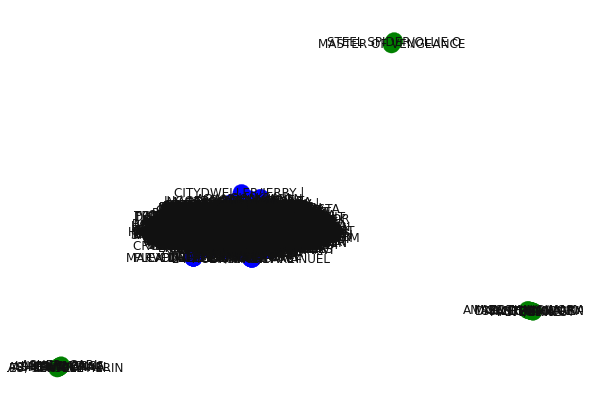

In [85]:
# plot the communities
color_map = []
for node in G1:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  

nx.draw(G1, node_color=color_map, with_labels=True)
plt.show()

In [86]:
pip install backend

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
  Preparing metadata (setup.py) ... done
  Created wheel for backend: filename=backend-0.2.4.1-py3-none-any.whl size=6660 sha256=007919695cc2c1cd0b07b79b6010f8d18aa74402a583de75ac9f2a6e7b1dda46
  Stored in directory: /home/ec2-user/.cache/pip/wheels/96/54/5e/9b2084ca047105a95bf6a70e6b1fd36efef78d5c71c16829fe
Successfully built backend
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [87]:
import networkx as nx

In [ ]:
from backend.graph import get_n_heroes_per_comic, get_subgraph_with, get_hero_collabs
from backend.service import TopHeroService
from .describe import GraphType, GraphFeatures, get_degree_dist, get_hubs, get_graph_mode
from .domain import Disconnection

In [ ]:
def _edge_to_remove(graph):
    G_dict = nx.edge_betweenness_centrality(graph)
    edge = ()

    # extract the edge with highest edge betweenness centrality score
    for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse=True):
        edge = key
        break

    return edge


def _girvan_newman(graph):
    # find number of connected components
    sg = nx.connected_components(graph)
    sg_count = nx.number_connected_components(graph)

    while (sg_count == 1):
        graph.remove_edge(_edge_to_remove(graph)[0], _edge_to_remove(graph)[1])
        sg = nx.connected_components(graph)
        sg_count = nx.number_connected_components(graph)

    return sg


def extract_communities(graph: nx.Graph):
    """Cuts the given graph into separate communities.
    :arg
    graph (nx.Graph) - a networkx graph where heroes are connected to heroes.
    top_n (int) - the top n heroes to consider.
    **hero_1 (str) - the hero to be checked if it is in the same community as hero_2.
    **hero_2 (str) - the hero to be checked if it is in the same community as hero_1.
    :return
    (int, list, bool) - the lenght of the minimum cut that separates communities, the found communities, whether the
    two heroes are in the same community.
    """

    #hero_1, hero_2 = kwargs.get('hero_1'), kwargs.get('hero_2')

    #if not hero_1:
    #    raise ValueError(f'The hero_1 kwargs needs to be set.')
    #if not hero_2:
    #    raise ValueError(f'The hero_2 kwargs needs to be set.')


    #get_subgraph_with(top_heroes, neighbours=False)

    min_cut = nx.minimum_edge_cut(graph)

    # Find the communities using girvan_newman function
    unf = nx.Graph(graph)
    communities = list(_girvan_newman(unf))

    # Check if the hero_1 and hero_2 belong to the same community
    #same_community = False
    #for community in communities:
     #   if hero_1 in community and hero_2 in community:
      #      same_community = True
       #     break

    return len(min_cut), communities

In [ ]:
extract_communities(G1)

# QUESTION 3: FRONTED IMPLEMENTATION

## Visualization 1 - Visualize some features of the network 

**V1.1  A table containing the following general information about the graph:**

- Number of nodes in the network
- Density of the network
- Average degree of the network
- Whether the network is sparse or dense

In [ ]:
def table(graph):
    dataframe = pd.DataFrame([{'nodes' : G1.number_of_nodes(), 'densità' : density(graph),
                  'average_degree' : average_degre(graph), 'sparse_dense' : dense_or_sparse(graph)}])
    return dataframe.set_index(['nodes', 'densità', 'average_degree', 'sparse_dense'])

In [ ]:
table(G1)

**V1.2  A table that lists the network's hubs**

**V1.3 A plot depicting the number of collaborations of each hero in descending order (if the graph is type 1)**

- Inside the 'collaborations' function we have given as input N = 3, so the graph is displayed only for the first top 3 heroes. This choice is due to the fact that an N > 3 made the heroes' names all stick together (in the x-axis of the graph), so in terms of display it was not the best choice.

In [ ]:
# We create a list of tuples, where inside each tuple is the name of the hero and the number of collaborations it has made.
plot_sort_hero = sorted(collaborations(G1,1,3).items(), key=lambda x: x[1], reverse = True)

height = [t[1] for t in plot_sort_hero]
bars = [t[0] for t in plot_sort_hero]
y_pos = np.arange(len(bars))

plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.show()

**V1.4 A plot depicting the number of heroes who appeared in each comic, sorted in descending order (if the graph is type 2)**

- Same reason of above, inside the 'heros_per_comic' function we have given as input N = 9, so the graph is displayed only for the first top 9 comics (top in terms of number of heroes appeared). This choice is due to the fact that an N > 9 made the comics' names all stick together (in the x-axis of the graph), so in terms of display it was not the best choice.

In [ ]:
# We create a list of tuples, where inside each tuple is the name of the comic and the number of heroes appeared in that comic.
plot_sort_comic = sorted(heros_per_comic(G2, 2, 9).items(), key=lambda x: x[1], reverse = True)

height = [t[1] for t in plot_sort_comic]
bars = [t[0] for t in plot_sort_comic]
y_pos = np.arange(len(bars))

plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.show()

**V1.5 A plot depicting the degree distribution of the network**

- We decided to make two graphs that visualize the degree distribution for each graph:
  - Histogram
  - Scatter plot

In [ ]:
def histogram(graph):
    # Let's recall the distribution function and save it inside plot_v5_G1
    plot_v5 = distribution(graph)

    # Extract the dictionary keys and values into two separate lists
    keys = list(plot_v5.keys())
    values = list(plot_v5.values())

    # We decided to create the histogram choosing 40 bins
    plt.hist(values, bins=40, align='left')
    plt.show()

In [ ]:
def scatter_plot(graph):
    plot_v5 = distribution(graph)
    
    # Extract the dictionary keys and values into two separate lists
    keys = list(plot_v5.keys())
    values = list(plot_v5.values())

    plt.scatter(keys, values)
    plt.show()

- Let's visualize the histogram for the first graph (G1)

In [ ]:
histogram(G1)

- Let's visualize the scatter plot for the first graph (G1)

In [ ]:
scatter_plot(G1)

- Let's visualize the histogram for the second graph (G2)

In [ ]:
histogram(G2)

- Let's visualize the scatter plot for the second graph (G2)

In [ ]:
scatter_plot(G2)

## Visualization 2 - Visualize centrality measures

In [ ]:
df_vis2 = pd.DataFrame() # We create a new dataframe with all of our needed values.

In [ ]:
names_centralities = ['Betweenness', 'PageRank', 'Closeness', 'DegreeCentrality']
avg_centralities = [avg_centrality_bet, avg_centrality_pr, avg_centrality_cl, avg_centrality_deg]
centralities_node = [centrality_node_bet, centrality_node_pr, centrality_node_cl, centrality_node_deg]

In [ ]:
df_vis2['Centrality'] = names_centralities

In [ ]:
df_vis2['Avg Centrality'] = avg_centralities

In [ ]:
df_vis2['Nodes centrality'] = centralities_node

In [ ]:
df_vis2

Since we used the node 'CAPTAIN AMERICA' which is one of the top 5 superheros in the Marvel universe, we can understand why our closeness value is higher than the rest of our measures, since it represents the average length of the shortest path between the node and all the other nodes in the graph.
But if we look at the rest of the centrality measures used, we understand that all of them have a way lower value regarding the average centrality. This probably means that there are way less 'central' nodes (which makes sense because there are more 'comic' nodes than 'hero' nodes, and they have a lower centrality value).
We notice that the betweeness centrality value for this given node is also a high number, since it quantifies the number of times the node acts as a bridge along the shortest path between two other nodes, and it makes sense because we used the node 'CAPTAIN AMERICA', which appears in a lot of comics. The pagerank value, though, is lower: it means that every node is pretty important so it takes the value down by a bunch.

We understand that this analysis we did will change if we choose a 'comic' node, instead of a 'hero' node.

## Visualization 3 - Visualize the shortest-ordered route

In [90]:
print(dfedges['hero'].sample(5))
print(dfedges['hero'].sample(5))

59881      OVERMIND/GROM
71989          SHANG-CHI
33873    HOWARD THE DUCK
16446         CORSI, TOM
69289      SAINT, AMANDA
Name: hero, dtype: object
95887                    ZEUS
10731                   CANDY
34960    HULK/DR. ROBERT BRUC
85040    THUNDERBALL/DR. ELIO
83122    THING/BENJAMIN J. GR
Name: hero, dtype: object


In [91]:
first = '3-D MAN/CHARLES CHAN'
last = 'FIREBIRD/BONITA JUAR'

In [92]:
shortest_path = nx.shortest_path(G2, first, last)

shortest_path_edges = list(zip(shortest_path, shortest_path[2:]))[::2]
shortest_path_nodes = list(shortest_path[0::2])
edges = shortest_path[1::2]
names = {shortest_path_edges[i]:edges[i] for i in range(len(shortest_path_edges))}
plot1 = nx.Graph()
plot1.add_edges_from(shortest_path_edges)

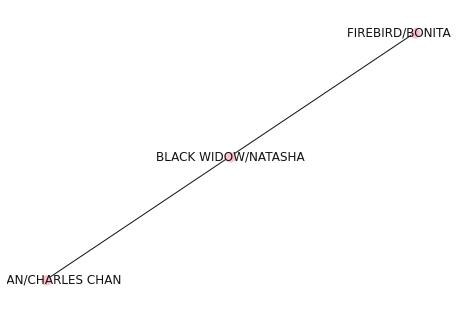

In [93]:
plt.figure()
plot2 = plt.gca()

nx.draw(plot1, nx.spring_layout(plot1), node_size=100, node_color='pink', alpha=1, labels = {node: node for node in plot1.nodes()})

plt.show()

## Visualization 4 - Visualize the disconnected graph

**First request**

In [ ]:
# Example
disconnectGraph(G_fun4, 'CAPTAIN AMERICA', 'SPIDER-MAN/PETER PARKER', 1000)

**Second request: before disconnecting graph**

In [ ]:
# Takes a while to run
plt.plot()
nx.draw(G_fun4)
plt.show()

**Third request: after disconnecting graph**

To disconnect the graph, we need to remove the edge (for one of the two nodes) that connects the nodes to a common node (which is a 'comic' node). This way we create two subgraphs for the two heros.

In [ ]:
## SBAGLIATO... DEVO CAMBIARLO! 

def disconnectGraphPlot(G, heroA, heroB, N=ln_N):
    """
    INPUT:
    'G' is the graph data
    'heroA' is the superhero to which will relate sub-graph G_a
    'heroB' is the superhero to which will relate sub-graph G_b
    'N' is the number of top heros that we consider for our calculations
    
    OUTPUT:
    The graph divided into the two subgraphs
    """
    
    G_top_N = topNsuperherosGraph(G, N)
    
    if heroA in G_top_N.nodes() and heroB in G_top_N.nodes():
        edges_A = list(G_top_N.edges(heroA))
        edges_B = list(G_top_N.edges(heroB))
        for i in edges_A:
            for j in edges_B:
                if i[1] == j[1]:
                    G_top_N.remove_edge(i[0], i[1])
                
    return G_top_N

# QUESTION 6: ALGORITHMIC QUESTION

In [ ]:
def password(directions):
    # This first part will be helpful for len(directions) equal to 5 and 6.
    # If the number of UNIQUE directions, for each type of direction, exceeds 2 then it's not possible because
    # that wouldn't fit in the 3x3 grid.
    count_D = 0
    count_L = 0
    count_R = 0
    count_U = 0
    for i in directions:
        if i == 'D':
            count_D += 1
        elif i == 'L':
            count_L += 1
        elif i == 'R':
            count_R += 1
        elif i == 'U':
            count_U += 1
    # We notice that for the len(directions) > 6 the solution would always be 0, because it's impossible
    # to find a password that has 7 different unique directions without them ever intersecting. So we study every possible
    # length from 1 to 6.
    if len(directions) == 1 or len(directions) == 2:
        return 9
    elif len(directions) == 3:
        return 15
    elif len(directions) == 4:
        if directions[0] == directions[2] and directions[1] == directions[3]:
            return 1
        # Examples: 'DRDR', 'LULU', 'DLDL'.
        # These have only one option (each 'step' has the length of 1 segment)
        # because the grid wouldn't fit more than 2 segments.
        else:
            return 5
        # Examples: 'DRDL', 'URDR', 'DLUL', 'RULD', 'DLUR', 'LDRU'
    elif len(directions) == 5:
        if count_D > 2 or count_L > 2 or count_R > 2 or count_U > 2:
            return 0
        if directions == directions[::-1]:
            return 8
        # Examples: 'DRURD', 'LDRDL', 'RULUR'
        # For this option we have 8 different options: this is because if the string is equal to its reverse then it creates
        # a sort of 'S'. So we have 8 different options, counting if we decide to start from the top (for examples) or
        # from the middle.
        else:
            if directions[0] == directions[-1]:
                return 4
            # Examples: 'DLURD', 'LDRUL', 'ULDRU'
            # These directions have 4 possibilities without the line intersecting.
            else:
                return 2
            # Examples: 'DLDRU', 'LDRUR', 'RDRUL'.
            # Two different options for these directions. Mostly because we can only have either 1 or 2 directions of
            # length = 2 segments, because then the 'busy' points, so the points where a segment has already passed through
            # would be 8 (and 9, in these cases, is impossible).
    elif len(directions) == 6:
        if count_D > 2 or count_L > 2 or count_R > 2 or count_U > 2:
            return 0
        else:
            if directions[0] != directions[4] and directions[1] == directions[5]:
                return 2
            # Example: 'DRULUR' = first D can either be 1 segment long or 2 segments long.
            elif directions[0] != directions[4] and directions[1] != directions[5] and directions[0:1] == directions[2:3]:
                return 1
            elif directions[0] == directions[4] and directions[1] != directions[5]:
                return 1
            elif directions[0] != directions[4] and directions[1] != directions[5] and directions[0:1] != directions[2:3]:
                return 3
            # Examples: 'DRDRUL' = 1 option, 'RDLDLU' = 3 options, 'DRULUR' = 2 options.
            elif directions[0] == directions[4] and directions[1] == directions[5]:
                return 0
    elif len(directions) > 6:
        return 0

**Let's do some examples..**

In [ ]:
directions = 'DRDL'
password(directions)

In [ ]:
directions = 'DRURD'
password(directions)

In [ ]:
directions = 'DRU'
password(directions)

In [ ]:
directions = 'DRULDR'
password(directions)